In [ ]:
import torch
import torch.nn as nn
import seaborn as sns
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, confusion_matrix, classification_report

# Defining neural network architecture

class MyNet(nn.Module):
  def __init__(self,in_channels, out_channels,n_classes):
    super(MyNet,self).__init__()

    self.conv1 = nn.Conv2d(1,16,kernel_size = 3, stride = 1, padding = 1)
    self.relu1 = nn.ReLU()
    self.maxpool = nn.MaxPool2d(kernel_size = 2, stride = 2)
    self.conv2 = nn.Conv2d(16,32,kernel_size = 3, stride = 1, padding = 1)
    self.relu2 = nn.ReLU()
    self.fc1 = nn.Linear(4608, 256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,64)
    self.fc5 = nn.Linear(64, n_classes)
    self.relu3 = nn.ReLU()
    self.relu4 = nn.ReLU()
    self.relu5 = nn.ReLU()
    self.relu6 = nn.ReLU()
    self.relu7 = nn.ReLU()

  def forward(self,x):
    out = self.conv1(x)
    out = self.relu1(out)
    out = self.maxpool(out)
    out = self.conv2(out)
    out = self.relu2(out)
    out = self.maxpool(out)
    out = out.view(out.size(0),-1)
    out = self.fc1(out)
    out = self.relu3(out)
    out = self.fc2(out)
    out = self.relu4(out)
    out = self.fc3(out)
    out = self.relu5(out)
    out = self.fc4(out)
    out = self.relu6(out)
    out = self.fc5(out)
    out = self.relu7(out)
    return out

# Customizing dataset class
class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.labels[idx]
        return x, y

In [ ]:

# Loading and preprocessing the dataset
df = pd.read_csv('im.csv')
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Converting the data to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

X_train = X_train.view(-1, 1, 50, 50)
X_test = X_test.view(-1, 1, 50, 50)

# Creating DataLoader objects for training and testing sets
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)



train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Defining the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 64
num_classes = 6

model = MyNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 40

for epoch in range(num_epochs):
    for inputs, targets in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Evaluation
model.eval()
total_correct = 0
total_samples = 0

with torch.no_grad():
    for inputs, targets in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)
        total_samples += targets.size(0)
        total_correct += (predicted == targets).sum().item()

accuracy = total_correct / total_samples
print(f'Test accuracy: {accuracy}')


Epoch 1/40, Loss: 0.004523984622210264
Epoch 2/40, Loss: 1.109073281288147
Epoch 3/40, Loss: 0.3968605101108551
Epoch 4/40, Loss: 0.014504126273095608
Epoch 5/40, Loss: 1.8000077034230344e-05
Epoch 6/40, Loss: 0.44812026619911194
Epoch 7/40, Loss: 0.017952173948287964
Epoch 8/40, Loss: 0.019402513280510902
Epoch 9/40, Loss: 3.1722189305583015e-05
Epoch 10/40, Loss: 0.2240070402622223
Epoch 11/40, Loss: 0.2240271270275116
Epoch 12/40, Loss: 0.22403600811958313
Epoch 13/40, Loss: 0.22397691011428833
Epoch 14/40, Loss: 0.00028229880263097584
Epoch 15/40, Loss: 0.4030168056488037
Epoch 16/40, Loss: 1.148855790233938e-05
Epoch 17/40, Loss: 6.562306953128427e-05
Epoch 18/40, Loss: 0.01864910125732422
Epoch 19/40, Loss: 0.011999695561826229
Epoch 20/40, Loss: 0.00010581337846815586
Epoch 21/40, Loss: 1.4901152667334827e-07
Epoch 22/40, Loss: 1.4901160305669237e-08
Epoch 23/40, Loss: 6.6904735831485596e-06
Epoch 24/40, Loss: 1.6420623069279827e-05
Epoch 25/40, Loss: 1.0028286851593293e-05
Epoc

Epoch 1/40, Loss: 0.0052, Accuracy: 0.9986
Epoch 2/40, Loss: 0.0086, Accuracy: 0.9974
Epoch 3/40, Loss: 0.0080, Accuracy: 0.9977
Epoch 4/40, Loss: 0.0145, Accuracy: 0.9966
Epoch 5/40, Loss: 0.0135, Accuracy: 0.9975
Epoch 6/40, Loss: 0.0172, Accuracy: 0.9954
Epoch 7/40, Loss: 0.0103, Accuracy: 0.9977
Epoch 8/40, Loss: 0.0096, Accuracy: 0.9975
Epoch 9/40, Loss: 0.0202, Accuracy: 0.9950
Epoch 10/40, Loss: 0.0115, Accuracy: 0.9968
Epoch 11/40, Loss: 0.0044, Accuracy: 0.9987
Epoch 12/40, Loss: 0.0224, Accuracy: 0.9945
Epoch 13/40, Loss: 0.0060, Accuracy: 0.9983
Epoch 14/40, Loss: 0.0116, Accuracy: 0.9970
Epoch 15/40, Loss: 0.0061, Accuracy: 0.9985
Epoch 16/40, Loss: 0.0087, Accuracy: 0.9978
Epoch 17/40, Loss: 0.0285, Accuracy: 0.9948
Epoch 18/40, Loss: 0.0048, Accuracy: 0.9984
Epoch 19/40, Loss: 0.0048, Accuracy: 0.9989
Epoch 20/40, Loss: 0.0337, Accuracy: 0.9926
Epoch 21/40, Loss: 0.0050, Accuracy: 0.9987
Epoch 22/40, Loss: 0.0083, Accuracy: 0.9985
Epoch 23/40, Loss: 0.0103, Accuracy: 0.99

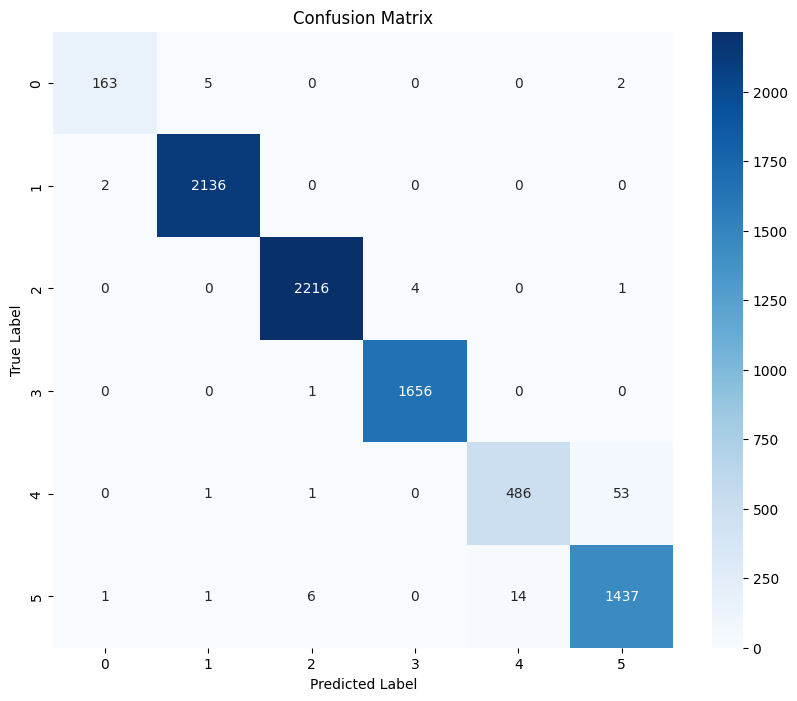

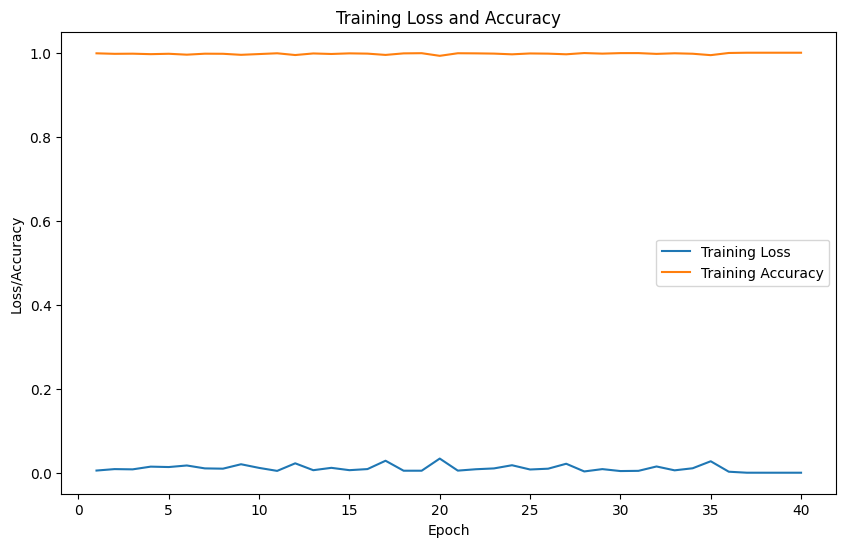

In [ ]:
num_epochs = 40
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_correct_train = 0
    total_samples_train = 0
    total_loss_train = 0.0

    for inputs, targets in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, dim=1)
        total_samples_train += targets.size(0)
        total_correct_train += (predicted == targets).sum().item()
        total_loss_train += loss.item()

    epoch_loss = total_loss_train / len(train_dataloader)
    epoch_accuracy = total_correct_train / total_samples_train

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

# Evaluation
model.eval()
total_correct = 0
total_samples = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, targets in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)
        total_samples += targets.size(0)
        total_correct += (predicted == targets).sum().item()

        true_labels.extend(targets.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Test accuracy: {accuracy}')

# Calculating F1 score and recall
f1 = f1_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
print(f'Test F1 score: {f1}')
print(f'Test recall: {recall}')

# Drawing the confusion matrix plot using Seaborn
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting training loss and accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.title('Training Loss and Accuracy')
plt.legend()
plt.show()

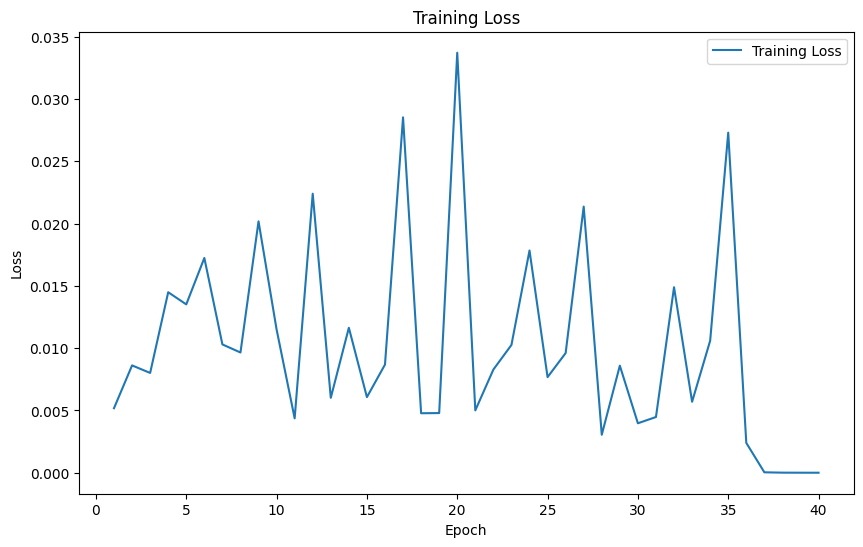

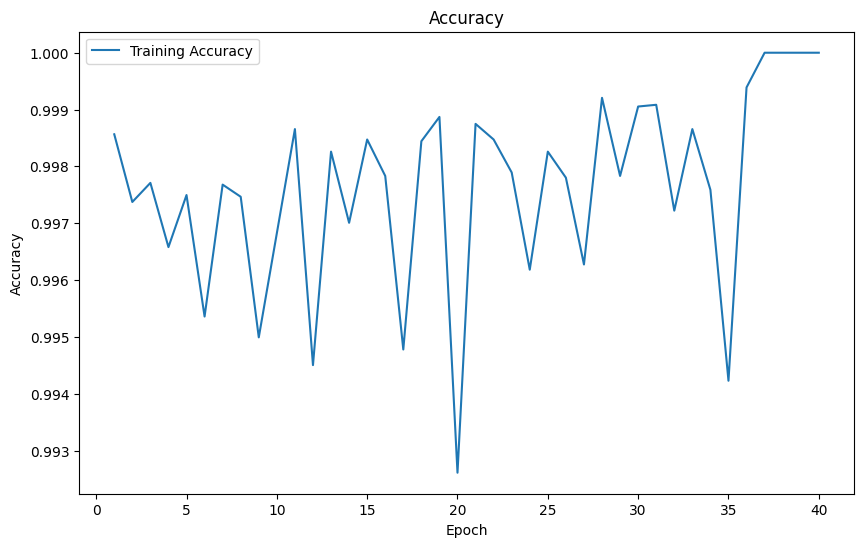

In [ ]:
# Plotting training loss and accuracy separately
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()